# Proyecto final Introducción a la Inteligencia Artificial


#### Integrantes:
Diego Romero Iregui \
Sergio Esteban Prieto Vargas \
Oscar Julian Rodriguez Cardenas


## Introducción

En el siguiente notebook se encuentra un proyecto en el cual implementamos modelos de clasificación de machine learning, y aprendimos cuáles son los datos que importan para el entrenamiento de estos modelos y como suministrarlos. 

Aunque identificar y preprocesar los datos para que los modelos aprendan de forma satisfactoria fue gran parte de nuestro trabajo, encontramos más aprendizajes a lo largo de la realización del proyecto. Una de las enseñanzas fue comprender la relación entre los datos que le proveemos al programa para su entrenamiento, y los resultados finales de cada uno de los modelos de inteligencia artificial. Las demás enseñanzas las comentaremos a medida que avanzamos en el código.


##### Nota 1: Para presentar este documento, describiremos los pasos que hicimos durante la primera iteración del código y la implementación del primer modelo. Los otros modelos se hacen de manera similar, por lo cual los comentarios serán reducidos, si existe algo notable que merezca la pena comentar, se agregara en el lugar correspondiente.

## Pasos del programa.
#####    1. Importamos las librerías.
#####    2. Definimos las funciones importantes.
#####    3. Realizamos el preprocesamiento de nuestra base de datos mediante las funciones definidas.
#####    4. Tuneamos los hiperparámetros para el modelo.
#####    5. Mostramos los hiperparámetros que se usaran para el modelo.
#####    6. Dividimos los datos de forma aleatoria, en k grupos, tal de que tengan el mismo tamaño para entrenar el modelo usando estas divisiones e manera aleatoria. (KFold)
#####    7. Generamos la curva de validación y observamos los resultados.
#####    8. Generamos las matrices de confusión y reportes de clasificación.

##### Particiones: Debido a que se contaba con una base de datos medianamente grande, utilizamos una partición para training del 80% y para test del 20%, decidimos organizar nuestra base de datos de la siguiente manera: un directorio llamado DB, dentro de este tres directorios denominados Squares, Circles y Rectangles, dentro de cada directorio incluir las imagenes respectivas.

#### Medida de desempeño:
Para la medida que desempeño decidimos elegir observar la curva de validación; observamos cuál era la diferencia para cada punto entre la precisión de entrenamiento y la precisión del modelo en el dataset de test. Tomamos esta medida de desempeño porque agrupa la información de: si el modelo esta aprendiendo o esta memorizando y la precisión al clasificar las imágenes de prueba.

## PIPELINE

Una vez descargado el notebook y subido a un entorno de ejecución adecuado, (como lo son colab, jupyter notebooks, deepnote...) , se debe proveer una base de datos.

Para poder análizar de las imágenes, se deberán modificar los paths en ciertos lugares del notebook.
El primero se encuentra dentro de la función image_preprocessing, que a su vez se encuentra en la primera celda debajo del título "Funciones". \
La función image_processing convierte en array las imagenes dentro de una carpeta, cuyo nombre está representado por la variable "shape". En otras palabras, se debe especificar la carpeta donde se encuentran las imágenes a procesar con la variable "shape". \
Lo segundo a modificar se encuentra en la celda de abajo, donde la funcion image_processing recibe el nombre de la carpeta donde se encontrarán las imágenes. Evidentemente se deberá cambiar el nombre de la carpeta al deseado.

Una vez adaptado el notebook a la base de datos, se deberá ejecutar el notebook en su totalidad, luego se podrá ver el rendimiento de los diferentes métodos

##   1. Importamos las librerias.


In [ ]:
#Fundamentales
import pandas as pd
import numpy as np
from PIL import Image
import glob


#Modelos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Utilidades y preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


##    2. Definimos las funciones importantes.


El preprocesamiento que desarrollamos para estas imágenes es el siguiente; tomamos la imagen y la escalamos a 100x100 pixeles para reducir el numero de elementos que el modelo tiene que analizar, posteriormente el resultado lo pasamos a una escala de grises, lo cual reduce tres veces los objetos de análisis por que en lugar de tener los canales RGB, queda un solo canal. Como último paso tomamos la imagen y organizamos el valor de los pixeles en un arreglo, este arreglo es el que usaremos para alimentar a nuestro modelo y luego para verificar que tan exitoso fue el entrenamiento de cada uno de los modelos.

In [ ]:
#En la siguiente funcionSe cambia el tamaño de la imagen a 
# 100x100 pixeles, y se cambia a escala de grises.


def resize_gray_images(array, longitud):         
    

    for i in range(longitud):
        
        img = Image.fromarray(array[i])
        image_resize  = img.resize((100, 100))
        #img = Image.fromarray(image_resize)
        imgGray = image_resize.convert('L')
        array[i] = np.array(imgGray)
    
    return array

#La siguiente función recibe la dirección de una carpeta,
#luego se transforman las imagenes dentro en array y se llama a la 
#función que las redimensiona y cambia el color.

def image_preprocessing(shape):

    
    
    fold = glob.glob('DB/'+shape+'/*.png')
    fold_t = np.array([np.array(Image.open(fname)) for fname in fold])
    fold_t = resize_gray_images(fold_t, len(fold_t))
    
    return fold_t

##    3. Realizamos el preprocesamiento de nuestra base de datos mediante las funciones definidas.


In [ ]:
#Para cada carpeta se hace el preprocesamiento de las imágenes

circle_array = image_preprocessing('Circles')
square_array = image_preprocessing('Squares')
rectangle_array = image_preprocessing('Rectangles')

#Se cambia el formato de las imagenes, para poder insertarlas en un 
#dataframe, y se añade un dato que indica qué forma se encuentra 
#en la imagen, al ver de qué carpeta proviene

images = []
    
for img in circle_array:
    img = img.reshape(100*100)
    l = []
    for pixel in img:
        l.append(pixel)
    l.append(0)
    images.append(l) 
    
for img in square_array:
    img = img.reshape(100*100)
    l = []
    for pixel in img:
        l.append(pixel)
    l.append(1)
    images.append(l)
    
for img in rectangle_array:
    img = img.reshape(100*100)
    l = []
    for pixel in img:
        l.append(pixel)
    l.append(2)
    images.append(l) 

#print(len(images),images)


#Se crea el dataframe con los resultados
df = pd.DataFrame(images)
df = df.sample(frac=1).reset_index(drop=True) #Shuffling the dataframe




X = df.drop(columns=[10000])
y = df[10000]

#Se divide la base de datos de manera aleatoria para obtener
#los arreglos que corresponden a train y a test


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#-------------------------------------------------------------------------------------------

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# SVM (Support Vector Machines)

##    4. Tuneamos los hiperparametros para el modelo.


In [ ]:
transformer = KernelPCA(n_components=2, kernel='linear')
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)


In [ ]:
param_grid = {'C': [100, 1000],
              'gamma': [ 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


svmc = SVC()

CV_svmc = GridSearchCV(estimator=svmc, param_grid=param_grid, cv = 5).fit(X_train,y_train)
params = CV_svmc.best_params_

##    5. Mostramos los hiperparametros que se usaran para el modelo.


In [ ]:
params

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

##    6. Dividimos los datos de forma aleatoria, en k grupos, tal de que tengan el mismo tamaño para entrenar el modelo usando estas divisiones e manera aleatoria. (KFold)


In [ ]:
scores = []
svm = SVC(C=params['C'], gamma=params['gamma'],kernel=params['kernel'])
cv = KFold(n_splits=10, random_state=41,shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    svm.fit(X_train, y_train)
    
    predictions = svm.predict(X_test)
    score = accuracy_score(y_test, predictions) 
    
    scores.append(score)

In [ ]:
scores

[1.0,
 0.7,
 0.95,
 0.9473684210526315,
 0.9473684210526315,
 0.7368421052631579,
 0.8421052631578947,
 1.0,
 0.9473684210526315,
 0.8947368421052632]

##### Nota 2: Estudiando la relación entre la cantidad de datos con la que alimentamos las funciones, y lo que veíamos en los resultados encontramos que la precisión del modelo daba como resultado 1. El motivo por el cual esto sucede es que las imágenes son muy similares entre ellas y debido al preprocesamiento que hicimos, las imágenes son aún más parecidas entre sí. Como la identificación entre imágenes se vuelve algo casi trivial, la precisión de las mediciones llega al valor de 1, lo que significa que no se equivoca al clasificar. Lo anterior también puede significar que suceda lo que se llama overfitting, esto significa es que el modelo esta memorizando cuáles son las respuestas correctas, no aprendiendo a identificar. Esta última idea se refuerza debido a que algunos resultado obtenidos, mostraban una precisión para el entrenamiento de valor 1 y mucha diferencia con la precisión de los valores de los test. 

##    7. Generamos la curva de validacion y observamos los resultados.


In [ ]:
param_range=np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(C=params['C'], gamma=params['gamma'],kernel=params['kernel']), 
                                             X, 
                                             y, 
                                             param_name="gamma", 
                                            param_range=param_range,
                                             cv=cv, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

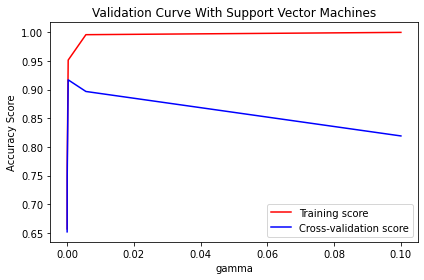

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="red")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green")

# Create plot
plt.title("Validation Curve With Support Vector Machines")
plt.xlabel("gamma")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

##    8. Generamos las matrices de confusion y reportes de clasificación.

In [ ]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  1  0]
 [ 1 11  0]
 [ 0  0  2]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00         2

    accuracy                           0.89        19
   macro avg       0.91      0.91      0.91        19
weighted avg       0.89      0.89      0.89        19



### Interpretación de la matriz de confusión

En este caso, la primera fila de la matriz nos indica que 4 circulos fueron clasificados como círculos, 1 círculo fue clasificado como cuadrados y ningún círculo fue clasificado como rectángulo.
Interpretando de la misma manera, vemos en la segunda fila que 11 cuadrados fueron clasificados correctamente y 1 cuadrado fue calificado como circulo.
Y finalmente, la última fila nos indica que dos rectángulos fueron clasificados correctamente.

#### Interpretacion de resultados SVM: 

Durante el entrenamiento del modelo podemos observar que hay overfitting, ya que se alegan los valores del entrenamiento y el testeo, esta idea se refuerza ya que los valores del entrenamiento llegan 1 y los del testeo no superan el 0.9


# Random Forest

##    4.

In [ ]:
transformer = KernelPCA(n_components=4, kernel='linear')
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
param_grid = { 
    'n_estimators': [10,50,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['entropy','gini'],
    'max_depth':[1,2,3]
     
}


rfc= RandomForestClassifier()


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10).fit(X_train,y_train)
params = CV_rfc.best_params_

## 5.

In [ ]:
params

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

## 6. 

In [ ]:
scores = []
rf = RandomForestClassifier(n_estimators=params['n_estimators'],max_depth=params['max_depth'],max_features=params['max_features'],criterion=params['criterion'])
cv = KFold(n_splits=10, random_state=42,shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    
    predictions = rf.predict(X_test)
    score = accuracy_score(y_test, predictions) 
    
    scores.append(score)

In [ ]:
scores

[0.85,
 0.85,
 0.75,
 0.8947368421052632,
 0.6842105263157895,
 0.7368421052631579,
 0.8421052631578947,
 0.9473684210526315,
 0.8947368421052632,
 0.7894736842105263]

## 7.

In [ ]:
param_range=np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators=params['n_estimators'],max_depth=params['max_depth'],max_features=params['max_features'],criterion=params['criterion']), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                            param_range=param_range,
                                             cv=cv, 
                                             scoring="accuracy", 
                                             
                                             n_jobs=-1)

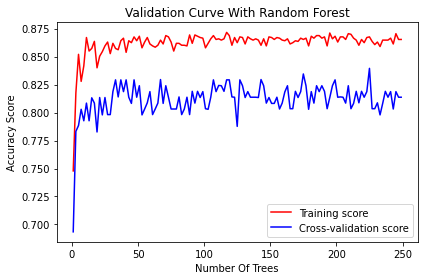

In [ ]:

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="red")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## 8.

In [ ]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  2  0]
 [ 1  5  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.71      0.83      0.77         6
           2       0.00      0.00      0.00         1

    accuracy                           0.79        19
   macro avg       0.52      0.56      0.53        19
weighted avg       0.75      0.79      0.77        19

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

### Interpretación de la matriz de confusión
Es posible interpretar de la matriz de confusión que de 12 circulos, 10 fueron etiquetados como circulos y 2 como cuadrados; de 6 cuadrados 1 fue etiquetado como cuadrado y 5 fueron etiquetados como cuadrados; finalmente de 1 rectangulo este fue etiquetado como circulo.

#### Interpretacion de resultados Random Forest: 

Como podemos observar este modelo se acerca mucho a lo deseado, debido a que los valores de entrenamiento y testeo son similares y la diferencia entre ellos no es mucha. Lo anterior significa que el modelo esta realmente aprendiendo en lugar de memorizando.

# Gaussian Naive Bayes

# 4.

In [ ]:
transformer = KernelPCA(n_components=1, kernel='linear')
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [ ]:
param_grid = { 
    
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
     
}

gnb = GaussianNB()


CV_gnbc = GridSearchCV(estimator=gnb, param_grid=param_grid, cv= 10).fit(X_train,y_train)
params = CV_gnbc.best_params_

# 5.

In [ ]:
params

{'var_smoothing': 1e-08}

# 6.

In [ ]:
scores = []
gnb = GaussianNB(var_smoothing=params['var_smoothing'])
cv = KFold(n_splits=10, random_state=42,shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    gnb.fit(X_train, y_train)
    
    predictions = gnb.predict(X_test)
    score = accuracy_score(y_test, predictions) 
    
    scores.append(score)

In [ ]:
scores

[0.7,
 0.85,
 0.6,
 0.47368421052631576,
 0.47368421052631576,
 0.47368421052631576,
 0.631578947368421,
 0.6842105263157895,
 0.5789473684210527,
 0.6842105263157895]

In [ ]:
param_range = np.arange(3, 20, 2)
train_scores, test_scores = validation_curve(gnb, 
                                             X, 
                                             y, 
                                             param_name="var_smoothing", 
                                            param_range=param_range,
                                             cv=cv, 
                                             scoring="accuracy",      
                                             n_jobs=-1)

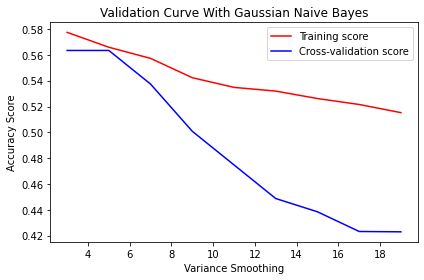

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="red")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green")

# Create plot
plt.title("Validation Curve With Gaussian Naive Bayes")
plt.xlabel("Variance Smoothing")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## 8.

In [ ]:
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  2  0]
 [ 3  3  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         1

    accuracy                           0.68        19
   macro avg       0.44      0.44      0.44        19
weighted avg       0.64      0.68      0.66        19

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

### Interpretación de la matriz de confusión

En este caso, la primera fila de la matriz nos indica que 10 circulos fueron clasificados como círculos, 2 círculos fueron clasificados como cuadrados y ningún círculo fue clasificado como rectángulo.
Interpretando de la misma manera, vemos en la segunda fila que 3 cuadrados fueron clasificados como círculos, y 3 fueron clasificados correctamente.
Y finalmente, la última fila nos indica que un rectángulo fue clasificado como círculo.

#### Interpretacion de resultados Gauss Naive Bayes: 


En esta ocasión vemos resultados que van empeorando cuando el suavizado de varianza aumenta. 
Teniendo esto en cuenta podremos conjeturar en adelantado que este método tendrá un rendimiento menor una vez comparado con los otros en este proyecto.

# KNN (K-nearest Neighbors)

# 4.

In [ ]:
transformer = KernelPCA(n_components=3, kernel='linear')
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)


In [ ]:
param_grid = { 
    
    'n_neighbors':[1,2,3,4,5],
    'algorithm':['auto','ball_tree','kd_tree','brute']
     
}


knnc= KNeighborsClassifier()


CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 5).fit(X_train,y_train)
params = CV_knnc.best_params_


# 5.

In [ ]:
params

{'algorithm': 'auto', 'n_neighbors': 1}

# 6.

In [ ]:
scores = []
knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'],algorithm=params['algorithm'])
cv = KFold(n_splits=10, random_state=40,shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    score = accuracy_score(y_test, predictions) 
    
    scores.append(score)

In [ ]:
scores

[0.85,
 0.95,
 0.85,
 0.6842105263157895,
 0.7894736842105263,
 0.8421052631578947,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.7368421052631579]

# 7.

In [ ]:
param_range = np.arange(3, 20, 2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(n_neighbors=params['n_neighbors'],algorithm=params['algorithm']), 
                                             X, 
                                             y, 
                                             param_name="n_neighbors", 
                                            param_range=param_range,
                                             cv=cv, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

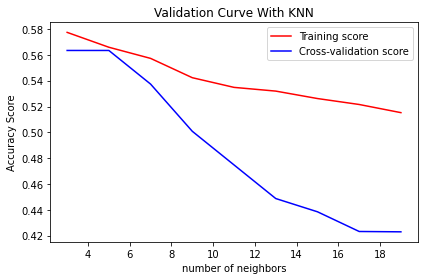

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="red")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green")

# Create plot
plt.title("Validation Curve With KNN")
plt.xlabel("number of neighbors")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# 8.

In [ ]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 4 0]
 [0 5 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.56      1.00      0.71         5
           2       1.00      0.80      0.89         5

    accuracy                           0.74        19
   macro avg       0.80      0.79      0.76        19
weighted avg       0.80      0.74      0.74        19



### Interpretación de la matriz de confusión

En este caso, la primera fila de la matriz nos indica que 5 circulos fueron clasificados como círculos, 4 círculos fueron clasificados como cuadrados y ningún círculo fue clasificado como rectángulo.
Interpretando de la misma manera, vemos en la segunda fila que todos los cuadrados fueron clasificados correctamente.
Y finalmente, la última fila nos indica que un rectángulo fue clasificado como círculo, y todos los demás fueron clasificados correctamente.

#### Interpretación de resultados KNN: 

En estos resultados observamos que los modelos van desmejorando, lo cual, evidentemente no es deseable. Aunque se sospechó la tenencia de overfitting, no existen evidencias que lo sugieran. Es importante notar que, aunque el porcentaje de acierto es alto, 
es probable que este método no se adapte óptimamente a la base de datos considerada. Por eso se evidenciaría la decadencia en los resultados del "cross-validation score".
Sospechamos que este fenómeno es debido a la similitud de los datos a analizar.

### Conclusiones:
De estos 4 modelos de aprendizaje supervisado, el que mejores resultados obtuvo fue RandomForest. Si se quisiera utilizar algún modelo para la clasificación de triángulos,cuadrados y círculos seguramente sería este, pues los otros tres modelos sufren de overfitting o el preprocesamiento de las imágenes no fue el correcto. 

Notamos que existe una gran relación entre la cantidad de datos que ingresan a los modelos y la probabilidad de que el modelo genere un overfitting en el resultado, y que la relación es inversa entre estas dos variables.

El overfitting es una condición no deseable recurrente, este comportamiento está asociado a muchas variables relacionadas con la solución del problema. Una de las aptitudes más valiosas para el correcto entrenamiento y uso de los modelos, es comprender cómo reducir el overfitting.

Con una base de datos tan pequeña y monótona es bastante probable que el modelo memorice las etiquetas, en lugar de aprender a clasificar correctamente. Se torna deseable el uso de bases de datos más grandes y más variadas.


#### Mejor modelo: Random Forest

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42f62597-1bef-47d0-ae61-8f8973ac7c4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>